# Pandas DataFrames Exercises

# Big Idea

**The Cycle of Improvement - James Clear (Atomic Habits)**

1. **Awareness -** identify what you need to improve.

2. **Deliberate practice -** focus your conscious effort on the specific area you want to improve.

3. **Habit -** with practice, the effortful becomes automatic.

4. **Repeat -** begin again.

# Objectives 

**By the end of the lesson and exercises, you will be able to...**

- **return valuable information about a pandas DataFrame.**

```python
df.shape
df.info()
df.describe()
```

- **create subsets of data from a pandas DataFrame.**

```python
df[bool_series]
.loc[row_indexer, col_indexer]
.iloc[row_indexer, col_indexer]
```

- **create and manipulate columns in a pandas DataFrame.**

```python
.drop(columns=)
.rename(columns={'original_name': 'new_name')
.assign(new_column = some_expression_or_calculation)
```

- **sort the data in a pandas DataFrame.**

```python
.sort_values(by=column(s))
.sort_index(ascending=True)
```

- **chain methods to perform more complicated data manipulations.**

```python
df.drop().rename()
```

<hr style="border-top: 10px groove turquoise; margin-top: 1px; margin-bottom: 1px"></hr>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from pydataset import data

<hr style="border-top: 10px groove turquoise; margin-top: 1px; margin-bottom: 1px"></hr>

### 1. Create student grades DataFrame object

In [2]:
np.random.seed(123)

students = ['Sally', 'Jane', 'Suzie', 'Billy', 'Ada', 'John', 'Thomas',
            'Marie', 'Albert', 'Richard', 'Isaac', 'Alan']

# randomly generate scores for each student for each subject
# note that all the values need to have the same length here

math_grades = np.random.randint(low=60, high=100, size=len(students))
english_grades = np.random.randint(low=60, high=100, size=len(students))
reading_grades = np.random.randint(low=60, high=100, size=len(students))

df = pd.DataFrame({'name': students,
                   'math': math_grades,
                   'english': english_grades,
                   'reading': reading_grades})

___

**Peek at DataFrame**

In [3]:
df.head()

,name,math,english,reading
0,Sally,62,85,80
1,Jane,88,79,67
2,Suzie,94,74,95
3,Billy,98,96,88
4,Ada,77,92,98


In [4]:
# Use shape attribute

df.shape

(12, 4)

In [5]:
# Use info method to view both datatypes and potential missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     12 non-null     object
 1   math     12 non-null     int64 
 2   english  12 non-null     int64 
 3   reading  12 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [6]:
# Use the `.describe()` method to produce descriptive statistics for columns with numeric datatypes

df.describe()

,math,english,reading
count,12.000000,12.000000,12.000000
mean,84.833333,77.666667,86.500000
std,11.134168,13.371158,9.643651
min,62.000000,62.000000,67.000000
25%,78.500000,63.750000,80.750000
50%,90.000000,77.500000,89.000000
75%,92.250000,86.750000,93.250000
max,98.000000,99.000000,98.000000


___

#### a. Create a column named `passing_english` that indicates whether each student has a passing grade in english.

In [7]:
# Create a boolean Series or a boolean mask that returns `True` for a passing English grade.

df.english >= 70

0      True
1      True
2      True
3      True
4      True
5      True
6     False
7     False
8     False
9      True
10     True
11    False
Name: english, dtype: bool

In [8]:
# Create a new column in our DataFrame and assign our boolean Series to it.

df['passing_english'] = df.english >= 70

In [9]:
# Check dataframe for new column.

df.head()

,name,math,english,reading,passing_english
0,Sally,62,85,80,True
1,Jane,88,79,67,True
2,Suzie,94,74,95,True
3,Billy,98,96,88,True
4,Ada,77,92,98,True


In [10]:
# How many students are passing English? 
# Use the `.sum()` function to add the True bool (1) values.

df['passing_english'].sum()

8

In [11]:
# How many students are failing English?
# Sum up the True values for failing English.

(df['passing_english'] == False).sum()

4

In [12]:
df.passing_english.mean()

0.6666666666666666

___

#### b. Sort the english grades by the `passing_english` column. How are duplicates handled?

- `.sort_values()` returns a sorted copy of a given DataFrame unless `inplace=True`.

```python
# Default arguments for .sort_values()

df.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
```

- It looks like duplicate values are handled according to the index value, small to large or ascending. *This is the same behavior we saw in SQL.*

In [13]:

# sorts all of the rows in the DF using the column passed

df.sort_values(by='passing_english')

,name,math,english,reading,passing_english
6,Thomas,82,64,81,False
7,Marie,93,63,90,False
8,Albert,92,62,87,False
11,Alan,92,62,72,False
0,Sally,62,85,80,True
1,Jane,88,79,67,True
2,Suzie,94,74,95,True
3,Billy,98,96,88,True
4,Ada,77,92,98,True
5,John,79,76,93,True


___

#### c. Sort the english grades first by `passing_english` and then by student `name`. 

- All the students that are failing english should be first, and the secondary sort is by their names ordered alphabetically. The same will be true for the students passing english. 

<div class="alert alert-block alert-info">
<b>Hint:</b> You can pass a list of columns to sort by to the .sort_values method.
</div>

In [14]:
# Now we see that Alan comes before Albert because there is a secondary sort going on alphabetically by name

df.sort_values(by=['passing_english', 'name'])

,name,math,english,reading,passing_english
11,Alan,92,62,72,False
8,Albert,92,62,87,False
7,Marie,93,63,90,False
6,Thomas,82,64,81,False
4,Ada,77,92,98,True
3,Billy,98,96,88,True
10,Isaac,92,99,93,True
1,Jane,88,79,67,True
5,John,79,76,93,True
9,Richard,69,80,94,True


In [15]:
# What if I want the students passing English first but names in alpha order?

df.sort_values(by=['passing_english', 'name'], ascending=[False, True])

,name,math,english,reading,passing_english
4,Ada,77,92,98,True
3,Billy,98,96,88,True
10,Isaac,92,99,93,True
1,Jane,88,79,67,True
5,John,79,76,93,True
9,Richard,69,80,94,True
0,Sally,62,85,80,True
2,Suzie,94,74,95,True
11,Alan,92,62,72,False
8,Albert,92,62,87,False


___

#### d. Sort the english grades first by `passing_english`, and then by the actual `english` grade, similar to how we did in the last step.

In [17]:
df.sort_values(by=['passing_english', 'english'])

,name,math,english,reading,passing_english
8,Albert,92,62,87,False
11,Alan,92,62,72,False
7,Marie,93,63,90,False
6,Thomas,82,64,81,False
2,Suzie,94,74,95,True
5,John,79,76,93,True
1,Jane,88,79,67,True
9,Richard,69,80,94,True
0,Sally,62,85,80,True
4,Ada,77,92,98,True


In [18]:
# Reverse my sort on both columns

df.sort_values(by=['passing_english', 'english'], ascending=[False, False])

,name,math,english,reading,passing_english
10,Isaac,92,99,93,True
3,Billy,98,96,88,True
4,Ada,77,92,98,True
0,Sally,62,85,80,True
9,Richard,69,80,94,True
1,Jane,88,79,67,True
5,John,79,76,93,True
2,Suzie,94,74,95,True
6,Thomas,82,64,81,False
7,Marie,93,63,90,False


___

#### e. Calculate each student's overall grade and add it as a column on the DataFrame. The overall grade is the average of the math, english, and reading grades.

- I can solve this problem using `.loc` if I want to select columns and rows using **column labels** instead of index position. With this attribute, **the indexing IS inclusive**. *This is not the behavior you are used to when indexing strings, lists, etc. by index position.*

```python
df.loc[row_indexer, column_indexer]
```

In [22]:
df[["math", "english", "reading"]].sum(axis=1)

0     227
1     234
2     263
3     282
4     267
5     248
6     227
7     246
8     241
9     243
10    284
11    226
dtype: int64

In [23]:
df[["math", "english", "reading"]].mean(axis=1)

0     75.666667
1     78.000000
2     87.666667
3     94.000000
4     89.000000
5     82.666667
6     75.666667
7     82.000000
8     80.333333
9     81.000000
10    94.666667
11    75.333333
dtype: float64

In [24]:
# I can now total these grades by row and get the overall average for each student.

df.loc[:, 'math': 'reading']

,math,english,reading
0,62,85,80
1,88,79,67
2,94,74,95
3,98,96,88
4,77,92,98
5,79,76,93
6,82,64,81
7,93,63,90
8,92,62,87
9,69,80,94


In [25]:
# I have to set my axis=1 to sum all of the columns for each row, grades for each student.

df.loc[:, 'math': 'reading'].sum(axis=1)

0     227
1     234
2     263
3     282
4     267
5     248
6     227
7     246
8     241
9     243
10    284
11    226
dtype: int64

In [26]:
# Now I can divide by 3 and assign this to a new column called overall_average

df['overall_average'] = round(df.loc[:, 'math': 'reading'].mean(axis=1))

In [29]:
df['overall_average'] = round(df[['math', 'english', 'reading']].mean(axis=1))

In [30]:
df

,name,math,english,reading,passing_english,overall_average
0,Sally,62,85,80,True,76.0
1,Jane,88,79,67,True,78.0
2,Suzie,94,74,95,True,88.0
3,Billy,98,96,88,True,94.0
4,Ada,77,92,98,True,89.0
5,John,79,76,93,True,83.0
6,Thomas,82,64,81,False,76.0
7,Marie,93,63,90,False,82.0
8,Albert,92,62,87,False,80.0
9,Richard,69,80,94,True,81.0


- The `.iloc` attribute allows me to access a group of rows and columns by their integer location or position. **The indexing is NOT inclusive**. *This is the behavior you are used to when indexing strings, lists, etc.*

```python
df.iloc[row_indexer, column_indexer]
```

In [31]:
# Here, I'm selecting all rows and columns at index positions 1, 2, 3. Now I can just sum them.

df.iloc[:, 1:4]

,math,english,reading
0,62,85,80
1,88,79,67
2,94,74,95
3,98,96,88
4,77,92,98
5,79,76,93
6,82,64,81
7,93,63,90
8,92,62,87
9,69,80,94


In [32]:
# Since I want the total of the columns in each row, I set axis=1 for columns.

df.iloc[:, 1:4].sum(axis=1)

0     227
1     234
2     263
3     282
4     267
5     248
6     227
7     246
8     241
9     243
10    284
11    226
dtype: int64

In [34]:
# Create a new column called overall_average and check my df.

df['overall_average'] = round(df.iloc[:, 1:4].mean(axis=1)).astype(int)
df

,name,math,english,reading,passing_english,overall_average
0,Sally,62,85,80,True,76
1,Jane,88,79,67,True,78
2,Suzie,94,74,95,True,88
3,Billy,98,96,88,True,94
4,Ada,77,92,98,True,89
5,John,79,76,93,True,83
6,Thomas,82,64,81,False,76
7,Marie,93,63,90,False,82
8,Albert,92,62,87,False,80
9,Richard,69,80,94,True,81


In [40]:
columns_I_need = ["name", "overall_average"]
df[columns_I_need]

,name,overall_average
0,Sally,76
1,Jane,78
2,Suzie,88
3,Billy,94
4,Ada,89
5,John,83
6,Thomas,76
7,Marie,82
8,Albert,80
9,Richard,81


In [43]:
# Only show name and overall_average
# df[["name", "overall_grade"]]
df.drop(columns=['math', 'english', 'reading', 'passing_english'])

,name,overall_average
0,Sally,76
1,Jane,78
2,Suzie,88
3,Billy,94
4,Ada,89
5,John,83
6,Thomas,76
7,Marie,82
8,Albert,80
9,Richard,81


<hr style="border-top: 10px groove turquoise; margin-top: 1px; margin-bottom: 1px"></hr>

### 2. Load the mpg dataset. Read the documentation for the dataset and use it for the following questions:

In [44]:
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [45]:
mpg = data('mpg')

In [46]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


___

#### a. How many rows and columns are there?

- Using the `.shape` attribute on my DataFrame returns number of (rows, columns).

In [47]:
mpg.shape

(234, 11)

In [48]:
print(f'There are {mpg.shape[0]} rows and {mpg.shape[1]} columns in the mpg DataFrame.')

There are 234 rows and 11 columns in the mpg DataFrame.


___

#### b. What are the data types of each column?

- Using the `.dtypes` attribute on my DataFrame returns the data type of each column.

In [49]:
mpg.dtypes

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object

___

#### c. Summarize the dataframe with the `.info()` and `.describe()` methods.

- `.info()` shows us that all of the columns have the same number of non-null values.


- `.describe()` provides us with the descriptive statistics for all columns with numeric dtypes.


In [50]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [51]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


___

#### d. Rename the `cty` column to `city` and `hwy` to `highway` using `.rename()` method.

- `.rename()` takes in a dictionary with the key as the original name and the value as the new name.


- If you want to change your original DataFrame to reflect your new column names, either assign to a variable or set `inplace=True`

In [60]:
mpg.rename(columns={'cty': 'city', 'hwy': 'highway'}, inplace=True)

In [53]:
mpg.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact


___

#### Another way to rename columns...

- This is another way you can rename columns, especially if you want to change many at once.


- I can use the `.columns` attribute to grab my column labels; I can go a step further and print out a list of the current columns in the DataFrame by adding the `.tolist()` method. It's not necessary if I'm just grabbing the column names, but I love getting the nice list.


- Then, I make any changes I want to the names in the list and reassign them to `df.columns`.

In [54]:
# Read in fresh data and assign to mpg.

mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [55]:
# Return a list of column names to copy and paste.

mpg.columns.tolist()

['manufacturer',
 'model',
 'displ',
 'year',
 'cyl',
 'trans',
 'drv',
 'cty',
 'hwy',
 'fl',
 'class']

In [ ]:
# Assign my list of column names back to mpg using the .columns attribute.

mpg.columns = ['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'city',
       'highway', 'fl', 'class']

In [ ]:
mpg.head(1)

___

#### e. Do any cars have better city mileage than highway mileage?

In [57]:
# Create a boolean Series or a boolean Mask

bool_series = mpg.cty > mpg.hwy
bool_series.head()

1    False
2    False
3    False
4    False
5    False
dtype: bool

In [58]:
# Return a subset of the original DataFrame using the indexing operator.

mpg[bool_series]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class


In [59]:
# I can do a quick check to validate my findings above. There are no observations that meet this condition.

bool_series.sum()

0

___

#### f. Create a column named `mileage_difference`; this column should contain the difference between highway and city mileage for each car.

- You saw above how to create a new column in a df using bracket notation; this time I'll show you how to create a new column in a df using the `.assign()` method.


- They are both valid ways to create a new column; if you want to create more than one column at once, `.assign()` is worth looking into. Choose your flavor...

In [61]:
# I can use the .assign() method and reassign to my df.

mpg = mpg.assign(mileage_difference = mpg.highway - mpg.city)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10


___

#### g. Which car (or cars) has the highest mileage difference?

- I'll show you the short and sweet way and validate with the longer way using a boolean Series to filter.

In [62]:
# Use .nlargest() to get all of the cars with the highest value in mileage_difference.

mpg.nlargest(1, 'mileage_difference', keep='all')

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference
107,honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact,12
223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,12


___

In [63]:
# Another way: use the `.max()` function to find the max value in the column.

mpg.mileage_difference.max()

12

In [64]:
# Create a boolean Series to identify matches with the max. 

bool_series = mpg.mileage_difference == mpg.mileage_difference.max()
bool_series.head()

1    False
2    False
3    False
4    False
5    False
Name: mileage_difference, dtype: bool

In [65]:
# Pass my bool_series as a selector for rows in my mpg Series.

mpg[bool_series]

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference
107,honda,civic,1.8,2008,4,auto(l5),f,24,36,c,subcompact,12
223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,12


In [66]:
# I can get more specific if I like and select rows AND columns.

mpg.loc[bool_series, ['manufacturer', 'model']]

,manufacturer,model
107,honda,civic
223,volkswagen,new beetle


___

#### h. Which compact class car has the lowest highway mileage?

- I can subset my data and get a DataFrame of only compact cars.


- I can then find the car(s) with the lowest highway mileage using the .nsmallest() method.

In [67]:
# Why doesn't this work??? 
# This is an example where you have to use bracket notation.

mpg.class

SyntaxError: invalid syntax (1172927149.py, line 4)

In [68]:
# A DataFrame of compact cars should contain 47 rows.

mpg['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [69]:
# Create the bool Series or selector for the compact class of cars.

bool_series = mpg['class'] == 'compact'
bool_series.head()

1    True
2    True
3    True
4    True
5    True
Name: class, dtype: bool

In [70]:
# Get a subset of compact cars from my mpg DataFrame. 47 rows.

compacts = mpg[bool_series]
compacts.shape

(47, 12)

In [71]:
# Remember, I can also get the row label(s) with the .nsmallest().

compacts.nsmallest(1, 'highway', keep='all')

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference
220,volkswagen,jetta,2.8,1999,6,auto(l4),f,16,23,r,compact,7


In [76]:
compacts.sort_values(by="highway").head(1)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference
220,volkswagen,jetta,2.8,1999,6,auto(l4),f,16,23,r,compact,7


___

**The best highway mileage?**

- I already have my DataFrame subset `compacts` to use here.


- I can now just use `.nlargest()`.


- I'll validate by sorting and using .head().

In [77]:
compacts.nlargest(1, 'highway', keep='all')

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,11


___

In [78]:
# I could also sort my values for highway and isolate rows using the .head() method.

compacts.sort_values(by='highway', ascending=False).head()

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,11
197,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,9
196,toyota,corolla,1.8,1999,4,manual(m5),f,26,35,r,compact,9
198,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact,9
195,toyota,corolla,1.8,1999,4,auto(l4),f,24,33,r,compact,9


In [79]:
# isolate the row using .head() method

compacts.sort_values(by='highway', ascending=False).head(1)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,11


___

####  j. Create a column named `average_mileage` that is the mean of the city and highway mileage.

- I can do this using bracket notation or `.assign()` method. Your choice.

In [80]:
# Create the calculated column

(mpg.city + mpg.highway) / 2

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
       ... 
230    23.5
231    25.0
232    21.0
233    22.0
234    21.5
Length: 234, dtype: float64

In [81]:
# Assign the Series back to the original DataFrame as a new column.

mpg['average_mileage'] = (mpg.city + mpg.highway) / 2

In [85]:
mpg[["city", "highway"]].mean(axis=1)

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
       ... 
230    23.5
231    25.0
232    21.0
233    22.0
234    21.5
Length: 234, dtype: float64

In [82]:
mpg.head(2)

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0


___

#### k. Which Dodge car has the best average mileage? The worst?

- I can solve this by creating a subset for dodge cars and finding the nlargest and nsmallest values for `average_mileage` like I did above for `highway` mileage.

In [86]:
# How many rows should be in my dodge subset? 37

mpg.manufacturer.value_counts()

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64

In [87]:
# Create the boolean Series to filter for Dodge vehicles only.

bool_series = mpg.manufacturer == 'dodge'
bool_series.head()

1    False
2    False
3    False
4    False
5    False
Name: manufacturer, dtype: bool

In [88]:
# Use the selector to create a subset of only Dodge vehicles. 37

dodges = mpg[bool_series]
dodges.shape

(37, 13)

In [89]:
# The best average_mileage.

dodges.nlargest(1, 'average_mileage', keep='all')

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference,average_mileage
38,dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan,6,21.0


In [90]:
# I can validate what I'm getting back here.

dodges.sort_values(by='average_mileage').tail()

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference,average_mileage
48,dodge,caravan 2wd,4.0,2008,6,auto(l6),f,16,23,r,minivan,7,19.5
43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24,r,minivan,7,20.5
42,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24,r,minivan,7,20.5
39,dodge,caravan 2wd,3.0,1999,6,auto(l4),f,17,24,r,minivan,7,20.5
38,dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan,6,21.0


___

In [91]:
# The worst average mileage.

dodges.nsmallest(1, 'average_mileage', keep='all')

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference,average_mileage
55,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,3,10.5
60,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,3,10.5
66,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,3,10.5
70,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup,3,10.5


In [92]:
# I can validate what I'm getting back here.

dodges.sort_values(by='average_mileage').head()

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference,average_mileage
70,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup,3,10.5
66,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,3,10.5
60,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,3,10.5
55,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,3,10.5
74,dodge,ram 1500 pickup 4wd,5.9,1999,8,auto(l4),4,11,15,r,pickup,4,13.0


___

In [93]:
# Another way: Find the min of average mileage and filter for matches.

worst_mileage = dodges.average_mileage.min()
worst_mileage

10.5

In [94]:
# Compare the average_mileage of each observation to the scalar value of worst_mileage; return ALL values that match.

dodges[dodges.average_mileage == worst_mileage]

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,mileage_difference,average_mileage
55,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,3,10.5
60,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,3,10.5
66,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,3,10.5
70,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup,3,10.5


<hr style="border-top: 10px groove turquoise; margin-top: 1px; margin-bottom: 1px"></hr>

### 3. Load the Mammals dataset. Read the documentation for it, and use the data to answer these questions:

In [95]:
data('Mammals', show_doc=True)

Mammals

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Garland(1983) Data on Running Speed of Mammals

### Description

Observations on the maximal running speed of mammal species and their body
mass.

### Usage

    data(Mammals)

### Format

A data frame with 107 observations on the following 4 variables.

weight

Body mass in Kg for "typical adult sizes"

speed

Maximal running speed (fastest sprint velocity on record)

hoppers

logical variable indicating animals that ambulate by hopping, e.g. kangaroos

specials

logical variable indicating special animals with "lifestyles in which speed
does not figure as an important factor": Hippopotamus, raccoon (Procyon),
badger (Meles), coati (Nasua), skunk (Mephitis), man (Homo), porcupine
(Erithizon), oppossum (didelphis), and sloth (Bradypus)

### Details

Used by Chappell (1989) and Koenker, Ng and Portnoy (1994) to illustrate the
fitting of piecewise linear curves.

### Source

Garland, T. (

In [96]:
# Load DataFrame and save as `mammals`.

mammals = data('Mammals')

In [97]:
mammals.head()

,weight,speed,hoppers,specials
1,6000.0,35.0,False,False
2,4000.0,26.0,False,False
3,3000.0,25.0,False,False
4,1400.0,45.0,False,False
5,400.0,70.0,False,False


___

#### a. How many rows and columns are there?

In [98]:
mammals.shape

(107, 4)

___

#### b. What are the data types?

In [99]:
mammals.dtypes

weight      float64
speed       float64
hoppers        bool
specials       bool
dtype: object

___

#### c. Summarize the dataframe with .info and .describe

In [100]:
mammals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 1 to 107
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   weight    107 non-null    float64
 1   speed     107 non-null    float64
 2   hoppers   107 non-null    bool   
 3   specials  107 non-null    bool   
dtypes: bool(2), float64(2)
memory usage: 2.7 KB


In [101]:
mammals.describe()

,weight,speed
count,107.000000,107.000000
mean,278.688178,46.208411
std,839.608269,26.716778
min,0.016000,1.600000
25%,1.700000,22.500000
50%,34.000000,48.000000
75%,142.500000,65.000000
max,6000.000000,110.000000


**Quick visualization of the distributioin of weight and speed values**

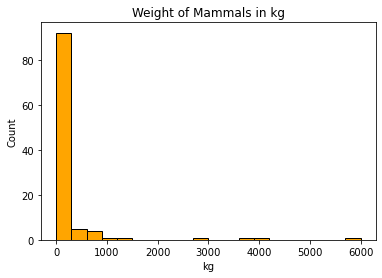

In [102]:
plt.hist(mammals.weight, bins=20, color='orange', edgecolor='black')

plt.title('Weight of Mammals in kg')
plt.xlabel('kg')
plt.ylabel('Count')

plt.show()

<AxesSubplot:>

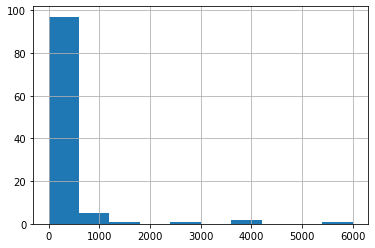

In [103]:
mammals.weight.hist()

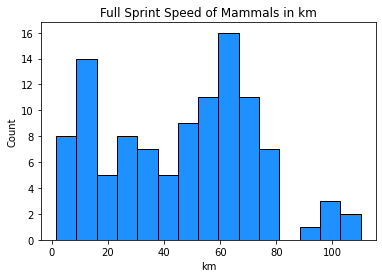

In [104]:
plt.hist(mammals.speed, bins=15, color='dodgerblue', edgecolor='black')

plt.title('Full Sprint Speed of Mammals in km')
plt.xlabel('km')
plt.ylabel('Count')

plt.show()

___

#### d. What is the the weight of the fastest animal?

In [105]:
# I can use nlargest on the speed column and return all fastest observations.

mammals.nlargest(1, 'speed', keep='all')

,weight,speed,hoppers,specials
53,55.0,110.0,False,False


In [106]:
# I can validate that there is one mammal with the fastest 110 km speed.

mammals.sort_values(by='speed', ascending=False).head()

,weight,speed,hoppers,specials
53,55.0,110.0,False,False
39,37.0,105.0,False,False
35,50.0,100.0,False,False
41,34.0,97.0,False,False
42,30.0,97.0,False,False


___

In [107]:
# OR -> I can create a boolan Series to filter for observations that match the max speed.

bool_series = mammals.speed == mammals.speed.max()
bool_series.head()

1    False
2    False
3    False
4    False
5    False
Name: speed, dtype: bool

In [108]:
# Pass my boolean Series to the indexing operator as a selector to find observations that match the fastest speed

mammals[bool_series]

,weight,speed,hoppers,specials
53,55.0,110.0,False,False


In [109]:
# Isolate the weight value if you want like this...

mammals[bool_series].weight

53    55.0
Name: weight, dtype: float64

___

#### e. What is the overall percentage of specials?

- Get the total number of mammals classified as `specials`. (10)


- Get the total number of mammals in the Dataset. (107)


- Divide the number of specials by the total number of mammals and multiply times 100 to get the percent. (9.35%)

In [ ]:
# We have a boolean Series already as specials.

mammals.specials.sample(10)

In [110]:
# First, I'll find the number of mammals classified as specials.
# I can sum the boolean Series to total up True values. 10 mammals classified as specials.

total_specials = mammals.specials.sum()
total_specials

10

In [111]:
# Find the total number of mammals in my df.

total_mammals = len(mammals)
total_mammals

107

In [112]:
# Divide the number of specials by the total number of mammals.

round(total_specials / total_mammals * 100, 2)

9.35

In [116]:
mammals.specials.mean()

0.09345794392523364

In [ ]:
# Make it pretty. :) 

print(f'{round(total_specials / total_mammals * 100, 2)}% of mammals in the df are specials.')

In [117]:
mammals.specials.value_counts(normalize=True)

False    0.906542
True     0.093458
Name: specials, dtype: float64

___

#### f. How many animals are hoppers that are above the median speed? What percentage is this?

- I interpreted this question as animals that are hoppers AND above the median speed for all mammals in our DataFrame.


- Capture the median speed of all mammals in the dataset. (48 km)


- Filter for mammals with speed above the median that are also classified as `hoppers`. (7)


- Divide the number of those `fast_hoppers` by the total number of mammals in the dataset and multiply times 100 to get the percent. (6.54%)

In [118]:
# Remind myself of column names and values.

mammals.head(1)

,weight,speed,hoppers,specials
1,6000.0,35.0,False,False


In [119]:
# Find the median speed of mammals in our df.

median_speed = mammals.speed.median()
median_speed

48.0

In [120]:
# Create boolean Series for mammals with speed above `median_speed` and True for hoppers

bool_series = (mammals.speed > median_speed) & (mammals.hoppers == True)
bool_series.head()

1    False
2    False
3    False
4    False
5    False
dtype: bool

In [125]:
# Make n amount of subsets to filter down
hoppers = mammals[mammals.hoppers]

faster_than_median_hopper = hoppers[hoppers.speed > median_speed]
faster_than_median_hopper

,weight,speed,hoppers,specials
96,4.6,64.0,True,False
97,4.4,72.0,True,False
98,4.0,72.0,True,False
99,3.5,56.0,True,False
100,2.0,64.0,True,False
101,1.9,56.0,True,False
102,1.5,50.0,True,False


In [121]:
# These are our fast hoppers.

fast_hoppers = mammals[bool_series]
fast_hoppers
len(fast_hoppers)

7

In [126]:
# Divide the number of fast_hoppers by the total number of mammals in the dataset.

round((len(fast_hoppers) / len(mammals)) * 100, 2)

6.54

In [127]:
# Make it pretty.

print(f'This puts fast hoppers at {round((len(fast_hoppers) / len(mammals)) * 100, 2)}% of the mammals.')

This puts fast hoppers at 6.54% of the mammals.


In [133]:
round(len(fast_hoppers) / len(mammals) * 100, 2)

6.54